## Gradient Descent

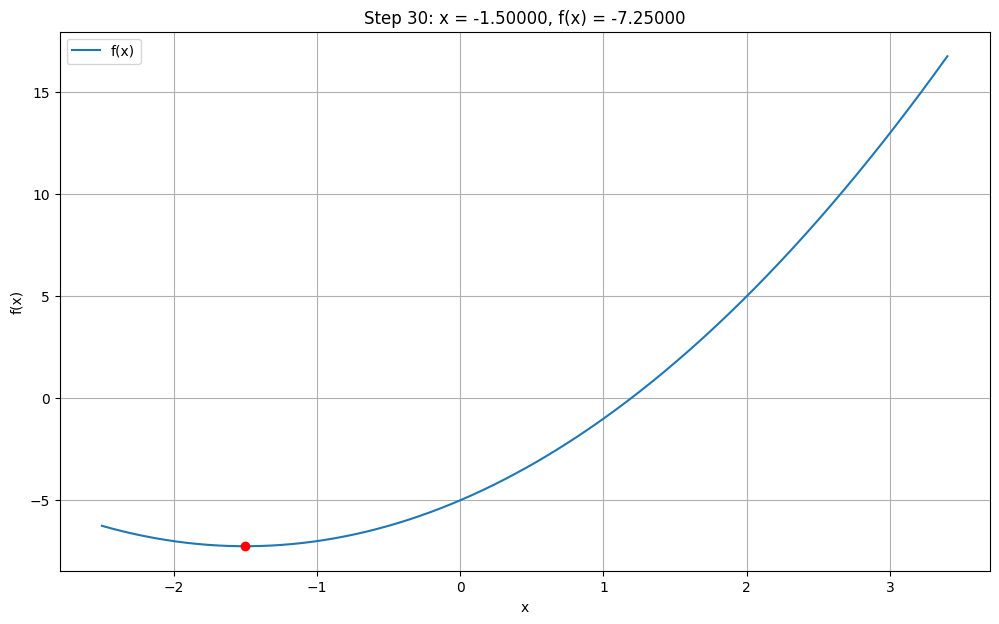

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# create function and it's gradient
def f(x):
    return x**2 + 3 * x - 5

def gradient_f(x):
    return 2 * x + 3

# gradient descent
def gradient_descent_path(gradient, x_init, alpha, max_iters=100, precision=1e-8):
    x = x_init
    path = [x]
    for _ in range(max_iters):
        grad = gradient(x)
        if abs(grad) < precision:
            break
        x = x - alpha * grad
        path.append(x)
    return path

x_init = 2.4
alpha = 0.25
path = gradient_descent_path(gradient_f, x_init, alpha)

x_vals = np.linspace(min(path)-1, max(path)+1, 400)
y_vals = f(x_vals)

for i, x in enumerate(path):
    clear_output(wait=True)
    plt.figure(figsize=(12, 7))
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(x, f(x), 'ro')  # current point
    plt.title(f"Step {i}: x = {x:.5f}, f(x) = {f(x):.5f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()
    time.sleep(0.4)